In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ld = pd.read_csv("Avg Force aug.csv", sep=',')
#ld=pd.read_csv("add may  load curve1.csv")
ld.head()

,dis,fx,Unnamed: 2,dis.1,fx.1,Unnamed: 5,dis.2,fx.2,Unnamed: 8,dis.3,fx.3,Unnamed: 11,dis.4,fx.4
0,0.1170,-0.000059,NaN,0.1170,-0.000103,NaN,0.1170,0.000014,NaN,0.11701,0.000053,NaN,0.11701,0.000316
1,0.1170,0.000103,NaN,0.1170,-0.000028,NaN,0.1170,0.000099,NaN,0.11704,0.000056,NaN,0.11704,0.000113
2,0.1171,0.000224,NaN,0.1171,-0.000019,NaN,0.1171,0.000136,NaN,0.11706,-0.000012,NaN,0.11706,-0.000143
3,0.1171,0.000213,NaN,0.1171,-0.000061,NaN,0.1171,0.000078,NaN,0.11709,-0.000032,NaN,0.11709,-0.000262
4,0.1171,0.000083,NaN,0.1171,-0.000048,NaN,0.1171,-0.000040,NaN,0.11711,0.000007,NaN,0.11711,-0.000308


13334 13334
13334 13334
13334 13334
13334 13334


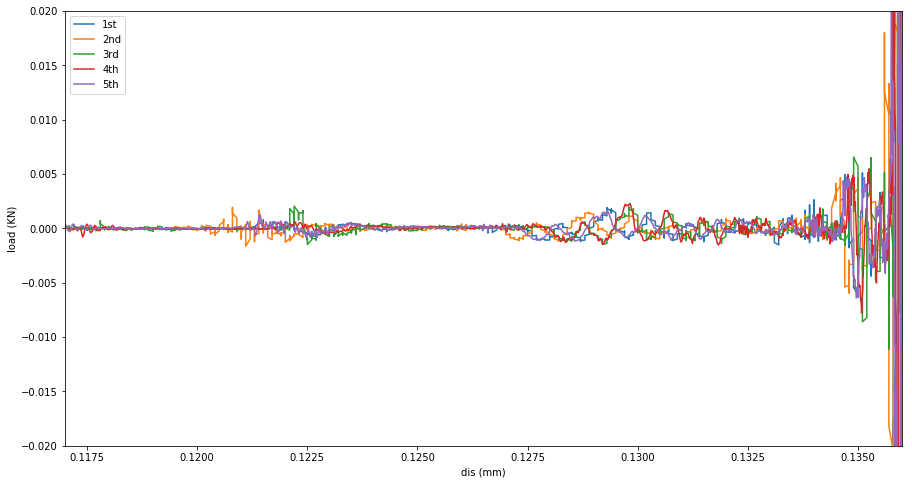

In [2]:
#data frame(column sequence),.values(array),.values.tolists()(list)
dis=ld['dis'].values.tolist()  
load=ld['fx'].values.tolist() 
dis1=ld['dis.1'].values.tolist()        
load1=ld['fx.1'].values.tolist() 
dis2=ld['dis.2'].values.tolist()          
load2=ld['fx.2'].values.tolist() 
dis3=ld['dis.3'].values.tolist()
load3=ld['fx.3'].values.tolist()
dis4=ld['dis.4'].values.tolist()
load4=ld['fx.4'].values.tolist() 

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dis,load)
ax.plot(dis1,load1)
ax.plot(dis2,load2)
ax.plot(dis3,load3)
ax.plot(dis4,load4)
ax.set_xlabel('dis (mm)'),plt.xlim(0.117,0.136)
ax.set_ylabel('load (KN)'),plt.ylim(-0.02,0.02)
ax.legend(['1st','2nd','3rd','4th','5th'])
print(len(dis),len(load))
print(len(dis1),len(load1))
print(len(dis2),len(load2))
print(len(dis3),len(load3))



In [3]:
addlist=dis+dis1+dis2+dis3+dis4  #find tac by sorting addlist
#print("addlist",addlist)
leng=len(addlist)
dac=sorted(addlist)
lengt=len(dac)
print("leng_dac",lengt)
print("leng_addlist",leng)
#print("dac",dac)

leng_dac 66670
leng_addlist 66670


In [4]:
dla1=dict(zip(dis,load))
dla2=dict(zip(dis1,load1))
dla3=dict(zip(dis2,load2))
dla4=dict(zip(dis3,load3))
dla4=dict(zip(dis4,load4))
#print(tla1)
d=[]
d.append(dla1)
d.append(dla2)
d.append(dla3)
d.append(dla4)
#print("d",d)
leng=len(d)
print(leng)
#print(key1)
#print(key2)

4


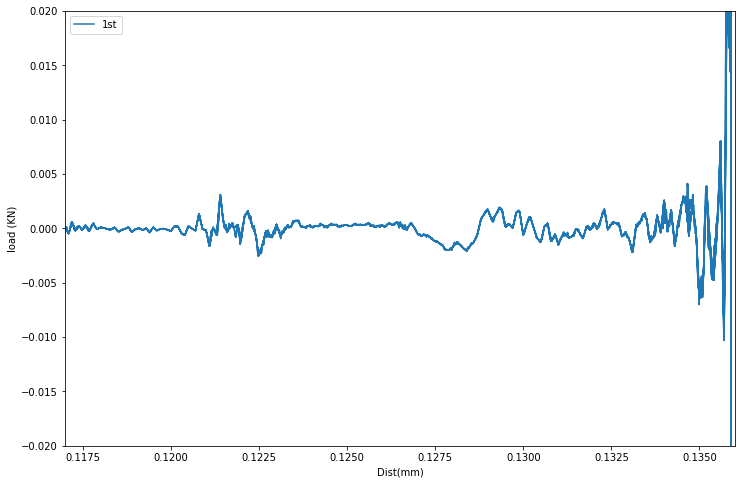

In [5]:
import numpy as np
#value_store=[]
load_v = np.array([],dtype = int)
da_v=np.array([],dtype=float)
for i in range (len(dac)):     #iterate and  loop through sorted time
    value=0.0
    #print("i",i,"value",value)
    for j in range(len(d)):    #iterate and loop through the #list (tlac1[0],tlac2[1],tlac3[2],tlac4[3])
        k0=0
        for k in d[j]:         #iterate and loop through the #elements in the lists (tlac1,tlac2,tlac3,tlac4)
            if k0 == 0:
                k0=1
                kk=k
            else:
                kj=kk
                kk=k
                da=(dac[i])
                #print("ta",ta, "kj",kj,"kk",kk)     
                if kj<da and da<=kk:
                    value=value+(d[j][kk]-d[j][kj])/(kk-kj)*(da-kj)+d[j][kj]   #interpolation
                    #print("value",value)
   # value_store.append(value)
    da_v=np.append(da_v,da)
    load_v=np.append(load_v,(value))
    
fig, ax = plt.subplots(figsize=(12,8))
#ax.plot(dis,load)
#ax.plot(dis1,load1)
#ax.plot(dis2,load2)
#ax.plot(dis3,load3)
#ax.plot(dis4,load4)
ax.plot(da_v,load_v)

ax.set_xlabel('Dist(mm)'),plt.xlim(0.117,0.136)
ax.set_ylabel('load (KN)'),plt.ylim(-0.02,0.02)

ax.legend(['1st','2nd','3rd','4th','Summation'])



In [ ]:
#loada=np.array([],dtype=float)
#loadb=np.array([],dtype=float)
#loadc=np.array([],dtype=float)
#loadd=np.array([],dtype=float)
#loade=np.array([],dtype=float)
x1=np.array([],dtype=float)
x0=0
for i in range (len(da_v)):
    x=da_v[i]
    xx=x-x0 #making a condition to avoid return cycle(-ve values terminator in) 
    x0=x
    if x>0.117 and x<0.136 and xx>0:
        x1=np.append(x1,x)
        l=load_v[i]
        loada=np.append(loada,l)
        #l1=load1[i]
        #loadb=np.append(loadb,l1)
        #l2=load2[i]
        #loadc=np.append(loadc,l2)
        #l3=load3[i]
        #loadd=np.append(loadd,l3)
        #l4=load4[i]
        #loade=np.append(loade,l4)
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x1,loada)
#ax.plot(x1,loadb)
#ax.plot(x1,loadc)
#ax.plot(x1,loadd)
#ax.plot(x1,loade)
ax.set_xlabel('dis (mm)')#,plt.xlim(0.117,0.136)
ax.set_ylabel('load (KN)')#,plt.ylim(-0.02,0.02)
ax.legend(['1st','2nd','3rd','4th','5th'])  

(Text(0,0.5,'load (KN)'), (-0.02, 0.02))

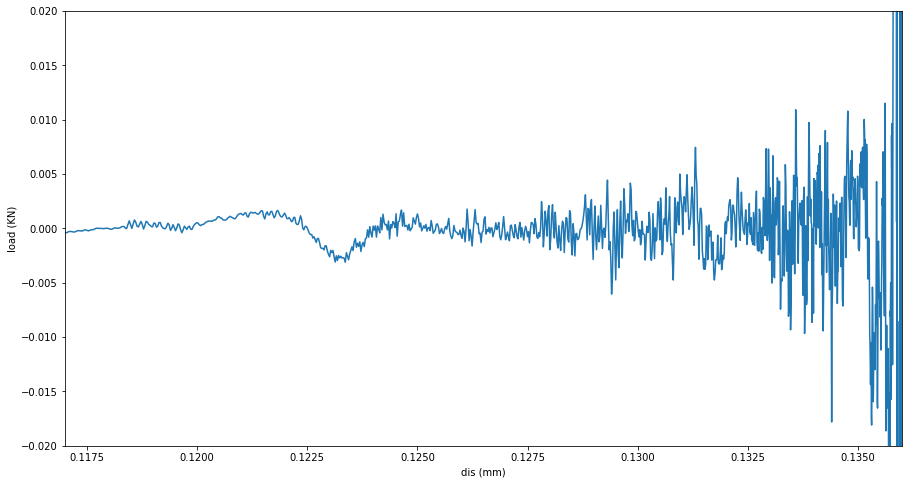

In [25]:
lavg=np.array([],dtype=float)
for i in range (len(x1)):
    la=loada[i]
    lb=loadb[i]
    lc=loadc[i]
    ld=loadd[i]
    le=loade[i]
    load_avg=la+lb+lc+ld
    lavg=np.append(lavg,load_avg)
    
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x1,lavg)
ax.set_xlabel('dis (mm)'),plt.xlim(0.117,0.136)
ax.set_ylabel('load (KN)'),plt.ylim(-0.02,0.02)

    

In [ ]:
forging_as=np.array([],dtype=float) #acceleration
forging_ps=np.array([],dtype=float) #position
#xa=dict(zip(x,p))
dis0=0
for i in range(len(p)):
    dis=x[i]
    acc=p[i]
    ddis=dis-dis0
    dis0=dis
    if dis>=0.117 and dis<=0.136 and ddis>0:
        forging_ps=np.append(forging_ps,dis)
        forging_as=np.append(forging_as,acc)
        

In [3]:
addlist=time1+time2+time3+time4 #find tac by sorting addlist
#print("addlist",addlist)
leng=len(addlist)

tac=sorted(addlist)
lengt=len(tac)
print("leng_tac",lengt)
print("leng_addlist",leng)
#print("tac",tac)



leng_tac 720
leng_addlist 720


In [4]:
tla1=dict(zip(time1,load1))
tla2=dict(zip(time2,load2))
tla3=dict(zip(time3,load3))
tla4=dict(zip(time4,load4))
#print(tla1)
t=[]
t.append(tla1)
t.append(tla2)
t.append(tla3)
t.append(tla4)
#print("t",t)
leng=len(t)
print(leng)
#print(key1)
#print(key2)



4


Text(0, 0.5, 'load (KN)')

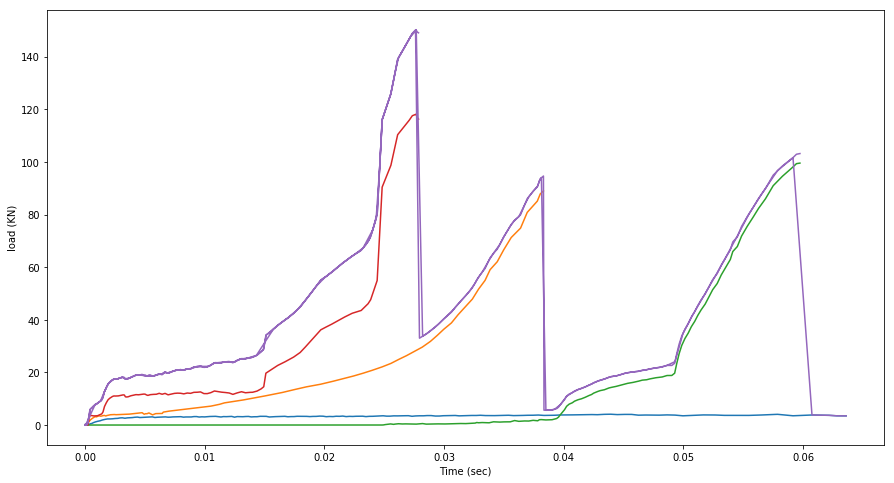

In [5]:
import numpy as np
value_store=[]
load_v = np.array([],dtype = int)
ta_v=np.array([],dtype=int)
for i in range (len(tac)):     #iterate and  loop through sorted time
    value=0.0
    #print("i",i,"value",value)
    for j in range(len(t)):    #iterate and loop through the #list (tlac1[0],tlac2[1],tlac3[2],tlac4[3])
        for k in t[j]:         #iterate and loop through the #elements in the lists (tlac1,tlac2,tlac3,tlac4)
            #print("k",k)
            if k != 0:
                kj=kk
                kk=k
                ta=(tac[i])
                #print("ta",ta, "kj",kj,"kk",kk)     
                if kj<ta and ta<=kk:
                    value=value+(t[j][kk]-t[j][kj])/(kk-kj)*(ta-kj)+t[j][kj]   #interpolation
                    #print("value",value)
                    
                                       
            kk=k
   # value_store.append(value)
    ta_v=np.append(ta_v,ta)
    load_v=np.append(load_v,(value))
    
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(time1,load1)
ax.plot(time2,load2)
ax.plot(time3,load3)
ax.plot(time4,load4)
ax.plot(ta_v,load_v)

ax.set_xlabel('Time (sec)')
ax.set_ylabel('load (KN)')
#length_load=len(load_v)
#length_time=len(ta_v)
#print("value",value_store)
#print("load",load_v)
#print("time",ta_v)
#print('length_load',length_load)
#print('length_time',length_time)
#leng=len(value_store1)
#print("length",leng)


In [ ]:
#panda data frame for time and load
#tl1_array=pd.DataFrame(np.array([time1,load1]))
#tl2_array=pd.DataFrame(np.array([time2,load2]))
#tl3_array=pd.DataFrame(np.array([time3,load3]))
#tl4_array=pd.DataFrame(np.array([time4,load4]))
#print(tl3)

In [ ]:

#tl1_array=pd.DataFrame(np.array([key1,values1]))
#tl2_array=pd.DataFrame(np.array([key2,values2]))
#tl3_array=pd.DataFrame(np.array([key3,values3]))
#tl4_array=pd.DataFrame(np.array([key4,values4]))
#print(tl1_array)

Text(0, 0.5, 'load (KN)')

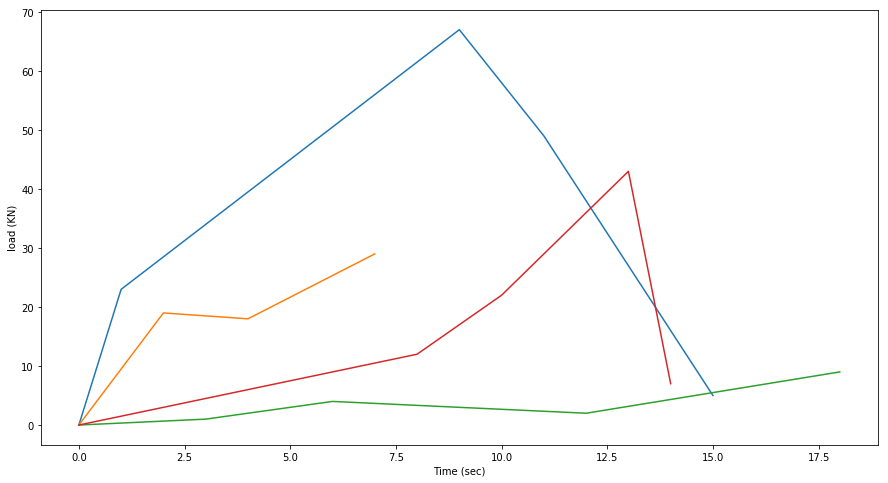

In [6]:
import numpy as np
import matplotlib.pyplot as plt

key1=[0,1,5,9,11,15]  #t=5
key2=[0,2,4,7]
key3=[0,3,6,12,18]
key4=[0,8,10,13,14]

values1=[0,23,45,67,49,5]  # l=5
values2=[0,19,18,29]
values3=[0,1,4,2,9]
values4=[0,12,22,43,7]

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(key1,values1)
ax.plot(key2,values2)
ax.plot(key3,values3)
ax.plot(key4,values4)
ax.set_xlabel('Time (sec)')
ax.set_ylabel('load (KN)')

#plt.plot(key1, values1)
#plt.plot(key2, values2)
#plt.xlabel("Time (s)")
#plt.ylabel("load(KN)")


In [7]:
import numpy as np
addlist=key1+key2+key3+key4
#addlist.sort()            # modifies (sort) the alraedy created list 
leng=len(addlist)
print(addlist)
print(leng)
tac1=sorted(addlist)        # makes a new list with modification (sorting)
#ta.append(tac)
print("tac1",tac1)



[0, 1, 5, 9, 11, 15, 0, 2, 4, 7, 0, 3, 6, 12, 18, 0, 8, 10, 13, 14]
20
tac1 [0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18]


In [8]:
tlac11=dict(zip(key1,values1))
tlac21=dict(zip(key2,values2))
tlac31=dict(zip(key3,values3))
tlac41=dict(zip(key4,values4))
#print(tlac1)
#print(tlac2)
#print(tlac3)
print("t4",tlac41)
t1=[]
t1.append(tlac11)
t1.append(tlac21)
t1.append(tlac31)
t1.append(tlac41)
print("t1",t1)

t4 {0: 0, 8: 12, 10: 22, 13: 43, 14: 7}
t1 [{0: 0, 1: 23, 5: 45, 9: 67, 11: 49, 15: 5}, {0: 0, 2: 19, 4: 18, 7: 29}, {0: 0, 3: 1, 6: 4, 12: 2, 18: 9}, {0: 0, 8: 12, 10: 22, 13: 43, 14: 7}]


Text(0, 0.5, 'load (KN)')

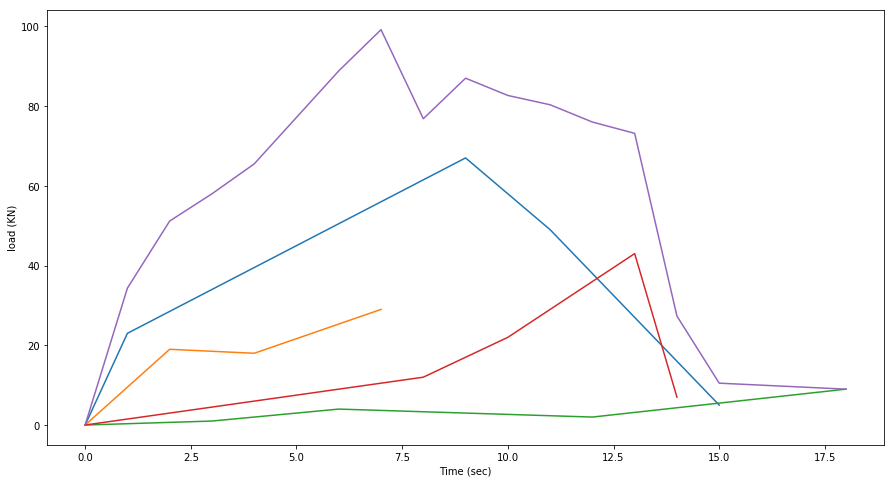

In [22]:
import numpy as np
value_store=[]
ld1_v = np.array([],dtype = int)
ta1_v=np.array([],dtype=int)
for i in range (len(tac1)):     #iterate and  loop through sorted time
    value=0.0
    #print("i",i,"value",value)
    for j in range(len(t1)):    #iterate and loop through the #list (tlac1[0],tlac2[1],tlac3[2],tlac4[3])
        for k in t1[j]:         #iterate and loop through the #elements in the lists (tlac1,tlac2,tlac3,tlac4)
            #print("k",k)
            if k != 0:
                kj=kk
                kk=k
                ta1=int(tac1[i])
                #print("ta",ta1, "kj",kj,"kk",kk)     
                if kj<ta1 and ta1<=kk:
                    value=value+(t1[j][kk]-t1[j][kj])/(kk-kj)*(ta1-kj)+t1[j][kj]   #interpolation
                    #print("value",value)
                                     
            kk=k
    ta1_v=np.append(ta1_v,ta1)
    ld1_v=np.append(ld1_v,(value))
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(key1,values1)
ax.plot(key2,values2)
ax.plot(key3,values3)
ax.plot(key4,values4)
ax.plot(ta1_v,ld1_v)

ax.set_xlabel('Time (sec)')
ax.set_ylabel('load (KN)')
#print("value",value_store)
#print("load",ld1_v)
#print("time",ta1_v)
#leng=len(value_store1)
#print("length",leng)
#print("array",arr)
                
                
                

In [10]:
#shaping array method
load=ld1_v.reshape(13,4) # the size of ta1_v willdecide the shape (4 columns*13 rows)
time=ta1_v.reshape(13,4) 
print('load',load)
print('time',time)


load [[23.         32.5        32.83333333 34.33333333]
 [28.5        47.5        48.16666667 51.16666667]
 [34.         52.5        53.5        58.        ]
 [39.5        57.5        59.5        65.5       ]
 [45.         66.66666667 69.66666667 77.16666667]
 [50.5        75.83333333 79.83333333 88.83333333]
 [56.         85.         88.66666667 99.16666667]
 [61.5        64.83333333 76.83333333 67.        ]
 [70.         87.         58.         60.66666667]
 [82.66666667 49.         51.33333333 80.33333333]
 [38.         40.         76.         27.        ]
 [30.16666667 73.16666667 16.         20.33333333]
 [27.33333333  5.         10.5         9.        ]]
time [[ 1  1  1  1]
 [ 2  2  2  2]
 [ 3  3  3  3]
 [ 4  4  4  4]
 [ 5  5  5  5]
 [ 6  6  6  6]
 [ 7  7  7  7]
 [ 8  8  8  9]
 [ 9  9 10 10]
 [10 11 11 11]
 [12 12 12 13]
 [13 13 14 14]
 [14 15 15 18]]


In [13]:
#list method
add2_store=[]
load=ld1_v.tolist()
time=ta1_v.tolist()
add_2=0
for i in range(len(load)):
    add_2i=add_2
    if time[i]-time[i+1]==0:
        print(time[i],time[i+1])
        add_2=add_2i+(load[i]+load[i+1])
        print(add_2)
        add2_store.append(add_2)
print(add2_store)


1 1
55.5
1 1
120.83333333333334
1 1
188.0
2 2
264.0
2 2
359.66666666666663
2 2
458.99999999999994
3 3
545.5
3 3
651.5
3 3
763.0
4 4
860.0
4 4
977.0
4 4
1102.0
5 5
1213.6666666666667
5 5
1350.0
5 5
1496.8333333333333
6 6
1623.1666666666665
6 6
1778.8333333333333
6 6
1947.5
7 7
2088.5
7 7
2262.1666666666665
7 7
2450.0
8 8
2576.3333333333335
8 8
2718.0
9 9
2855.0
9 9
3012.0
10 10
3130.6666666666665
10 10
3274.0
11 11
3374.3333333333335
11 11
3506.0
12 12
3584.0
12 12
3700.0
13 13
3757.1666666666665
13 13
3860.5
14 14
3896.8333333333335
14 14
3944.5
15 15
3960.0


IndexError: list index out of range

In [12]:
m=3
n=5
arr=np.zeros((m,n))
print(arr)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
 #array method
load=ld1_v
time=ta1_v
m=3
n=len(load)
arr=np.zeros((m,n))
for i in range (len(load)):
    for j in range (4):
        if time[i]==time[i+1] and time[i+1]==time[i+3]:
        arr=np.insert(arr,[i],time[i])
    elif time[i]!=time[i+1]:
            arr=np.insert(arr,[i],time[i])

In [63]:
#list method
add2_store=[]
load=ld1_v.tolist()
time=ta1_v.tolist()
add_2=0
for i in range(len(load)):
    add_2i=add_2
    if time[i]-time[i+1]==0:
        print(time[i],time[i+1])
        add_2=add_2i+(load[i]+load[i+1])
        print(add_2)
        add2_store.append(add_2)
print(add2_store)


1 1
55.5
1 1
120.83333333333334
1 1
188.0
2 2
264.0
2 2
359.66666666666663
2 2
458.99999999999994
3 3
545.5
3 3
651.5
3 3
763.0
4 4
860.0
4 4
977.0
4 4
1102.0
5 5
1213.6666666666667
5 5
1350.0
5 5
1496.8333333333333
6 6
1623.1666666666665
6 6
1778.8333333333333
6 6
1947.5
7 7
2088.5
7 7
2262.1666666666665
7 7
2450.0
8 8
2576.3333333333335
8 8
2718.0
9 9
2855.0
9 9
3012.0
10 10
3130.6666666666665
10 10
3274.0
11 11
3374.3333333333335
11 11
3506.0
12 12
3584.0
12 12
3700.0
13 13
3757.1666666666665
13 13
3860.5
14 14
3896.8333333333335
14 14
3944.5
15 15
3960.0


IndexError: index 52 is out of bounds for axis 0 with size 52

In [21]:
ta_la=dict(zip(ld1_v,ta1_v))
print(ta_la)
lengta_la=len(ta_la)
print(lengta_la)


{23.0: 1, 32.5: 1, 32.833333333333336: 1, 34.333333333333336: 1, 28.5: 2, 47.5: 2, 48.166666666666664: 2, 51.166666666666664: 2, 34.0: 3, 52.5: 3, 53.5: 3, 58.0: 10, 39.5: 4, 57.5: 4, 59.5: 4, 65.5: 4, 45.0: 5, 66.66666666666666: 5, 69.66666666666666: 5, 77.16666666666666: 5, 50.5: 6, 75.83333333333334: 6, 79.83333333333334: 6, 88.83333333333334: 6, 56.0: 7, 85.0: 7, 88.66666666666667: 7, 99.16666666666667: 7, 61.5: 8, 64.83333333333334: 8, 76.83333333333334: 8, 67.0: 9, 70.0: 9, 87.0: 9, 60.666666666666664: 10, 82.66666666666666: 10, 49.0: 11, 51.333333333333336: 11, 80.33333333333334: 11, 38.0: 12, 40.0: 12, 76.0: 12, 27.0: 13, 30.166666666666668: 13, 73.16666666666667: 13, 16.0: 14, 20.333333333333332: 14, 27.333333333333332: 14, 5.0: 15, 10.5: 15, 9.0: 18}
51


In [25]:
from collections import defaultdict
s = [('red',1), ('blue',2), ('red',3), ('blue',4), ('red',1), ('blue',4)]
d = defaultdict(list)
for k, v in s:
    d[k].append(v)  
sorted(d.items())



[('blue', [2, 4, 4]), ('red', [1, 3, 1])]

In [ ]:
sum_v = np.array([],dtype = int)
for k in (ta_v):
    if i!=0:
        ti=tj
        tj=i
    tj=i
while ta_v[i]==ta_v[i+1]:
    add=load_v[i]+load_v[i+1]
    sum_v=np.append(sum_v,add)
    i=i+1
print(sum_v)

In [248]:
sum_v=np.array([],dtype='i')
lb=np.array([2,3,4,5,6,7,8,9],dtype="i")
tb=np.array([1,1,1,2,2,3,3,4],dtype="i")
lbtb=dict(zip(lb,tb))
print(lbtb)




{2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 3, 8: 3, 9: 4}


NameError: name 'key' is not defined

In [ ]:
print("tb",tb)
print("lb",lb)
#for k in lb and for i in tb:
for k, i in zip(lb, tb):
        ti=tj
        tj=i
        if ti=tj:
            add=
#for k,i in range(len(tb)):
    if tb[i]==tb[i+1]:
        add=add+lb[k]+lb[k+1]
        sum_v=np.append(sum_v,add)
        #print(i)
    
print(sum_v)
lengj=len(j)
lengta=len(ta)
print(lengj,lengta)

In [243]:
#add1=0
lb=np.array([2,3,4,5,6,7,8,9],dtype="i")
tb=np.array([1,1,1,2,2,3,3,4],dtype="i")
lbtb=dict(zip(lb,tb))
print(lbtb)
#for i in range (len(lb)):
#for k,i in zip(lb,tb) :
#    print(k,i)
#    kj=kk
#    kk=i
    
    #print(kj,kk,i)

    

{2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 3, 8: 3, 9: 4}


In [173]:
a=[1.0,2.0,3.0,4.0]
b=[2.0,4.0]
c=[6.0]
addlist=a+b+c
leng=len(addlist)
print(addlist)
print(leng)

[1.0, 2.0, 3.0, 4.0, 2.0, 4.0, 6.0]
7


In [ ]:
for i in range (len(tac)):    #index key and value check
#    print("ta",ta[i])
    for j in range (len(t)):
#        print(t[j])
        for k in t[j]:
            print ("key",k,"list",j)   #keys
            #a=t[j][k]    #values  

In [ ]:
for i in range(len(ta_v)):
        if ta_v[i]==ta_v[i+1]:
            add=load_v[i]+load_v[i+1]
            sum_v=np.append(sum_v,add)
            i=i+1

In [ ]:
print(load_v)
shape=load_v.shape
load_v=load_v.reshape(13,4)  #can be decides on the basis of len of load_v=52=4rows 
shape1=load_v.shape
print(shape)
print(rshape)
print(shape1)
print(tac)

In [ ]:
for i in range len(tac):
    if i=t[j] 
    
    if i<4:
        t1.append(dv)
    if i>4 and i<8:
        t2.append(dv)
        
    l1=
    l2=
    l3=
    l4=

In [159]:
print(value_store)

[0.0, 0.0, 0.0, 0.0, 34.333333333333336, 51.166666666666664, 58.0, 65.5, 77.16666666666666, 88.83333333333334, 99.16666666666667, 76.83333333333334, 87.0, 82.66666666666666, 80.33333333333334, 76.0, 73.16666666666667, 27.333333333333332, 10.5, 9.0]


In [68]:
l1=[]
l2=[]
l3=[]
l4=[]

In [28]:

for i in range (len(tac)):
    if tac[i]==key1[i]:         #if during the search the (if tac[i]=key1[i]:)//(for values in key2)//tac in key1
        l1.append(values1[i])
    elif tac[i]==key2[i]:
        l2.append(values2[i])
    elif tac[i]==key3[i]:
        l3.append(values3[i])
    elif tac[i]==key4[i]:
        l4.append(values4[i])
print(l1)
print(l2)
        

IndexError: list index out of range

In [39]:
d = {'x': 1, 'y': 2, 'z': 3} 
for k in d:
    print(k)
    print(d[k]) #print values corresponding to keys

x
1
y
2
z
3


In [ ]:
for key in dict.iterkeys(): ...

for value in dict.itervalues(): ...

for key, value in dict.iteritems(): .

In [26]:
a = [12, 10, 50, 100, 24]
print (min(a))

10


In [37]:
import itertools
ab = itertools.chain(['it'], ['was'], ['annoying'])
list(ab)

['it', 'was', 'annoying']

In [42]:
a=[1,2,3,4,5]
b=[6,7,8,8]
c=[2,3,4,5]
d=a+b+c
print(d)

[1, 2, 3, 4, 5, 6, 7, 8, 8, 2, 3, 4, 5]


In [41]:
a=[1,2,3,4,5]+[6,7,8,8]+[2,3,4,5]
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 8, 2, 3, 4, 5]


In [9]:
#d = {'x': 1, 'y': 2, 'z': 3} 
#for key in d:
#    print (key)
    
d = {'x': 1, 'y': 2, 'z': 3} 
for key in d:
    print (key, 'corresponds to', d[key])

x corresponds to 1
y corresponds to 2
z corresponds to 3


In [ ]:
for k in dict_one.keys() & dict_two.keys():
    print(','.join(map(repr, (dict_one[k], dict_two[k])))

In [111]:
import numpy as np
t1=[0,2,3,5,6]
l1=[0,10,20,5,5]
t2=[1,4,7,8]
l2=[0,20,5,10,20]
t3=[9,12,15]
l3=[0,10,20,5,5]
t4=[11,13]
l4=[0,10]
A = [t1,t2]
B = [t3,t4]
C = np.zeros(A)
for i in xrange(len(A)):
    for j in xrange(len(A[0])):
        C[i][j] = max(A[i][j],B[i][j])
print(c)

TypeError: 'list' object cannot be interpreted as an integer

In [109]:
import numpy as np
t1=[0,2,3,5,6]
l1=[0,10,20,5,5]
t2=[1,4,7,8]
l2=[0,20,5,10,20]
t3=[9,12,15]
l3=[0,10,20,5,5]
t4=[11,13]
l4=[0,10]
a=zip(t1,l1)
b=zip(t2,l2)
c=zip(t3,l3)
d=zip(t4,l4)
key1=t1
key2=t2
key3=t3
key4=t4
value1=l1
value2=l2
value3=l3
value4=l4
print(list(a))
tla1=dict(zip(key1,value1))
tla2=dict(zip(key2,value2))
tla3=dict(zip(key3,value3))
tla4=dict(zip(key4,value4))
print(tla1)

    
    

[(0, 0), (2, 10), (3, 20), (5, 5), (6, 5)]
{0: 0, 2: 10, 3: 20, 5: 5, 6: 5}


TypeError: 'list' object is not callable

In [ ]:
keys = set(key1()) | set(key2()) | set(key3()) | set(key4())
for k in keys:
    ta=min(key1,key2,key3,key4)
print(ta)
if k in key1<key2:
    elif key1
    if k in key2:    
    if k in di1 and k in di2:
        # do something with di1[k] and di2[k]
    # ...

In [108]:
for i in range(t1):
    if t1[i]<t2[i]:
        ta=t1[i]
    else:
        ta=t2[i]
print(ta)

TypeError: 'list' object cannot be interpreted as an integer

In [71]:
a =[] #consit of [time,load]
b=[]
c=[]
d=[]
tl=[a,b,c,d]
for i in range(len(time1)):
    a.append([time1[i], load1[i]])
#print(a)

In [72]:
for i in range(len(time2)):
    b.append([time2[i], load2[i]])
#print(b)
for i in range(len(time3)):
    c.append([time3[i], load3[i]])
for i in range(len(time4)):
    d.append([time4[i], load4[i]])
    

In [73]:
#print(tl)

In [67]:
import numpy as np
t1=[0,2,3,5,6]
l1=[0,10,20,5,5]
t2=[1,4,7,8]
l2=[0,20,5,10,20]
t3=[9,12,15]
l3=[0,10,20,5,5]
t4=[11,13]
l4=[0,10]
matrix = []
for i in range(len(t1)):
    matrix.append([t1[i], l1[i]])
print(matrix)


[[0, 0], [2, 10], [3, 20], [5, 5], [6, 5]]


In [ ]:
for i in range(len(t4)):
    matrix.append([t4[i], l4[i]])
print(matrix)

In [45]:
set_a=zip(time1,load1)
keys=time1
values=load1
tla=dict(zip(keys,values)) #timeloada
#print(tla)
set_b=zip(time2,load2)
keys=time2
values=load2
tlb=dict(zip(keys,values))#timeloadb
#print(tlb)


#fig, ax = plt.subplots(figsize=(30,10))
#ax.plot(time1,time2)
#ax.set_xlabel('Time [s]')
#ax.set_ylabel('load [KN]')




In [44]:
t1=[0,2,3,5,6]
l1=[0,10,20,5,5]
t2=[0,1,4,7,8]
l2=[0,20,5,10,20]
a=zip(t1,l1)
b=zip(t2,l2)
keys1=t1
values1=l1
keys2=t2
values2=l2
lt1=dict(zip(keys1,values1))
lt2=dict(zip(keys2,values2))
print (lt1)
print(lt2)
ta=[]
for keys in lt1[keys1] & lt2[keys2]:
    if keys1 < keys2:
        ta=keys1[keys]
    else:
        ta=keys2[keys]
    ta.append(keys)
#result1=set(a).

print(ta)
print(c)



{0: 0, 2: 10, 3: 20, 5: 5, 6: 5}
{0: 0, 1: 20, 4: 5, 7: 10, 8: 20}


TypeError: 'dict' object is not callable

In [59]:
import numpy as np
t1=[0,2,3,5,6]
l1=[0,10,20,5,5]
t2=[1,4,7,8]
l2=[0,20,5,10,20]
t3=[9,12,15]
l3=[0,10,20,5,5]
t4=[11,13]
l4=[0,10]
tl1=np.column_stack(((t1,l1),(t2,l2),(t3,l3))
print(tl1)

SyntaxError: invalid syntax (<ipython-input-59-684ce5ea8b3b>, line 11)

[[0, 0], [2, 10], [3, 20], [5, 5], [6, 5]]


In [ ]:
a = [1, 2, 3, 4, 5]
b = [1.1, 2.2, 3.3, 4.4, 5.5]
zip(a,b)

#A good idea is to make dictionary from two lists:

keys = [1,2,3,4,5]
values = [1.1,2.2,3.3,4.4,5.5]
dictionary = dict(zip(keys, values))
dictionary
#{1: 1.1, 2: 2.2, 3: 3.3, 4: 4.4, 5: 5.5}
#But be carefull, the order in the dictionary is not saved. Access to the data from the dictionary is very simple:

dictionary.keys()

dictionary.values()

dictionary[1]
1.1
 

In [26]:
a = [1, 2, 3, 4, 5]
b = [1.1, 2.2, 3.3, 4.4, 5.5]
zip(a,b)
#If you want to get a from the zip(a,b), just write:
#[x[0] for x in zip(a, b)]
[y[0] for y in zip(a, b)]

[1, 2, 3, 4, 5]

In [27]:
numbersList = [1, 2, 3]
strList = ['one', 'two']
numbersTuple = ('ONE', 'TWO', 'THREE', 'FOUR')

result = zip(numbersList, numbersTuple)

# Converting to set
resultSet = set(result)
print(resultSet)

{(2, 'TWO'), (1, 'ONE'), (3, 'THREE')}


In [31]:
actual_time=[]
for i in range (lt):
    for j in range (lt):
        if i<j:
            actual_time=time1[i]
            actual_time.append(time1[i])
        elif i>j:
            actual_time=time[j]
            actual_time.append(time1[j])
            
print(actual_time)
        


AttributeError: 'numpy.float64' object has no attribute 'append'